Let's get started, import the TensorFlow library into your program, along with the library to plot graphs (matplotlib)

In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [ ]:
# Import the MNIST dataset from TensorFlow's Keras module
mnist = tf.keras.datasets.mnist

# Load the training and test data from the MNIST dataset.
# (x_train, y_train) are the training images and labels.
# (x_test, y_test) are the testing images and labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values of the training images to a range of 0 to 1.
# Originally, pixel values range from 0 to 255, so we divide by 255.
x_train = x_train / 255.0

# Normalize the pixel values of the test images to a range of 0 to 1.
x_test = x_test / 255.0


Visualize some of the dataset images

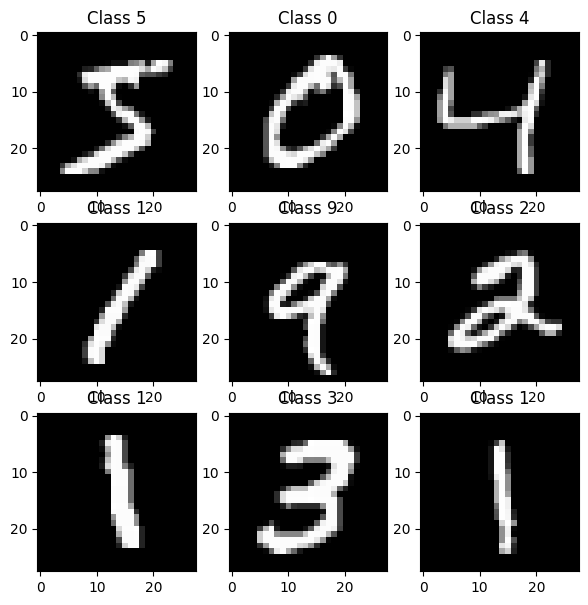

In [ ]:
# Loop through the first 9 images in the training dataset
for i in range(9):
    # Create a 3x3 grid of subplots and select the i-th subplot (i+1 because subplot index starts at 1)
    plt.subplot(3, 3, i + 1)

    # Display the i-th image in the training set using a grayscale color map ('gray')
    # 'interpolation="none"' ensures no smoothing of the pixel values
    plt.imshow(x_train[i], cmap='gray', interpolation='none')

    # Set the title of each subplot to the corresponding class label from y_train
    plt.title("Class {}".format(y_train[i]))

# This code will display the first 9 images from the training set along with their class labels in a 3x3 grid.


What is the size of the data?

In [ ]:
# Print the shape of the x_train array, which contains the training images
# This will give information about the dimensions of the training data
print("x_train original shape", x_train.shape)

# Print the shape of the y_train array, which contains the labels corresponding to the training images
# This will show the number of labels in the training set
print("y_train original shape", y_train.shape)


x_train original shape (60000, 28, 28)
y_train original shape (60000,)


Build the tf.keras model by stacking layers. Select an optimizer and loss function used for training:

In [ ]:
# Define a sequential model using TensorFlow's Keras API
model = tf.keras.models.Sequential([

    # First layer: Flatten the input (28x28 images) into a 1D vector (28*28 = 784)
    tf.keras.layers.Flatten(),

    # Second layer: Dense (fully connected) layer with 12 units and sigmoid activation function
    tf.keras.layers.Dense(12, activation=tf.nn.sigmoid),

    # Third layer: Dense layer with 200 units and sigmoid activation function
    tf.keras.layers.Dense(200, activation=tf.nn.sigmoid),

    # Dropout layer: Randomly sets 20% of input units to 0 to prevent overfitting
    tf.keras.layers.Dropout(0.2),

    # Output layer: Dense layer with 10 units (one for each digit class) and softmax activation
    # The softmax activation is used for multi-class classification, as it outputs probabilities for each class
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model with:
# - 'adam' optimizer (adaptive learning rate optimizer)
# - 'sparse_categorical_crossentropy' loss function (used for multi-class classification)
# - 'accuracy' metric to monitor the performance during training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train and evaluate model:

In [ ]:
# Train the model and store the training history
# Train the model using the training data (x_train, y_train)
# The model will iterate over the training data for 2 epochs (2 complete passes through the data)
history = model.fit(x_train, y_train, epochs=2, verbose=1)

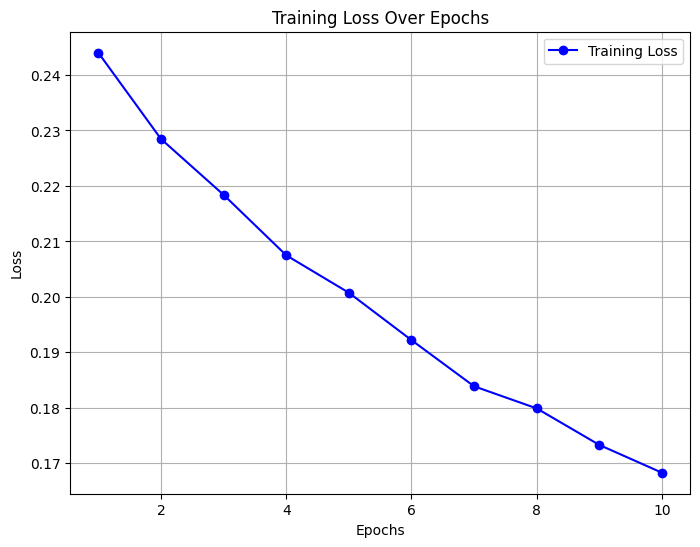

In [ ]:
# Extract the loss values for each epoch
loss_values = history.history['loss']
epochs = np.arange(1, len(loss_values) + 1)


# The training loss graph is crucial as it shows the model's learning progress,
# helps detect underfitting (high loss) or overfitting (training loss decreases
# but validation loss increases), and aids in fine-tuning. It ensures the model
# is improving and generalizing effectively to unseen data.

# Plot the training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values, marker='o', linestyle='-', color='b', label='Training Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Test Loss: 0.1854
Test Accuracy: 0.9478
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.93      0.96      0.94       982
           5       0.94      0.90      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



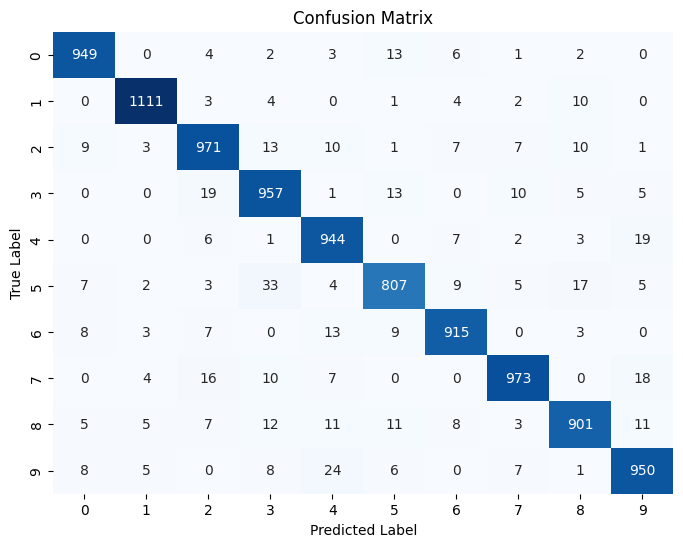

In [ ]:
# Evaluate the trained model on the test data
# This will compute and return the loss and accuracy on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get the model's predictions on the test data
y_pred_probs = model.predict(x_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Print a classification report (precision, recall, F1-score, support)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

See what you have got wrong!

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


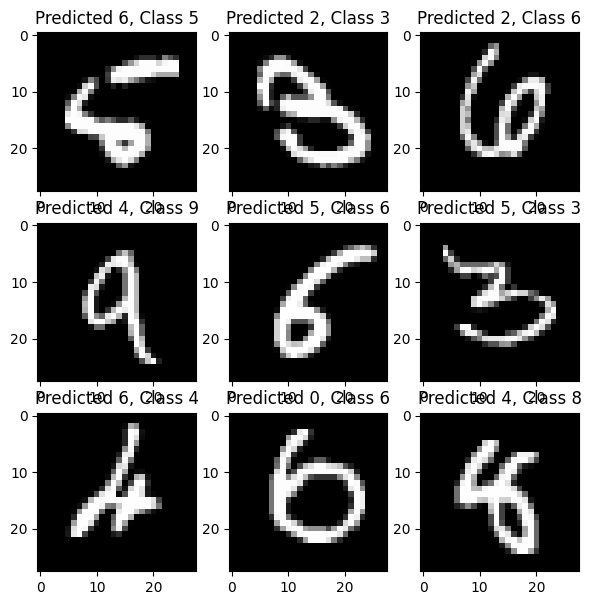

In [ ]:
# Predict function outputs an array with the probability for each class
# according to the trained classifier for each input example.
# The np.argmax will return the index of the maximum class probability
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# Check which items we got wrong
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

Now, let's create a convolutional neural network